## **라이브러리 로드**

In [9]:
import cv2
import numpy as np
import glob
import tqdm
import random
import math
import re
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/hansungData')

Mounted at /content/hansungData


# **컬러 색상 값 리스트** 

In [22]:
color_list = {
    "red1": (0, 0, 255),"red2": (71, 99, 255),"red3": (0, 0, 139),"red4": (143, 143, 188),"red5": (53, 47, 90),"red6": (39, 54, 249),"red7": (24, 20, 128),"red8": (37, 36, 65),"red9": (26, 22, 49),
    "pink1": (203, 192, 255),"pink2": (147, 20, 255),"pink3": (185, 218, 255),
    "orange1": (0, 165, 255),"orange2": (0, 140, 255),
    "yellow1": (0, 255, 255),"yellow2": (0, 215, 255),"yellow3": (49, 189, 230),"yellow4": (123, 225, 239),
    "beige1": (220, 245, 245),"beige2": (152, 176, 186),"beige3": (184, 197, 206),"beige4": (203, 209, 223),
    "green1": (0, 255, 0),"green2": (0, 100, 0),"green3": (127, 255, 0),"green4": (154, 250, 0),"green5": (139, 139, 0),"green6": (0, 128, 128),"green7": (0, 255, 0),"green8": (131, 146, 120),"green9": (96, 92, 14),"green10": (53, 50, 7),"green11": (48, 47, 42),"green12": (159, 182, 134),"green13": (55, 56, 38),"green14": (227, 235, 212),"green15": (46, 62, 63),
    "khaki1": (107, 183, 189),"khaki2": (118, 122, 115),"khaki3": (53, 69, 78),"khaki4": (67, 77, 75),"khaki5": (36, 58, 76),"khaki6": (62, 81, 98),
    "blue1": (255, 255, 0),"blue2": (255, 0, 0),"blue3": (139, 0, 0),"blue4": (235, 206, 135),"blue5": (255, 191, 0),"blue6": (163, 132, 100),"blue7": (103, 44, 22),"blue8": (223, 193, 161),"blue9": (121, 87, 22),
    "purple1": (238, 104, 123),"purple2": (112, 25, 25),"purple3": (219, 112, 147),"purple4": (139, 0, 139),
    "navy1": (128, 0, 0),"navy2": (64, 25, 19),"navy3": (69, 53, 45),"navy4": (51, 29, 13),"navy5": (32, 22, 18),"navy6": (57, 35, 25),
    "indigo1": (130, 0, 75),
    "brown1": (42, 42, 165),"brown2": (14, 143, 188),"brown3": (30, 105, 210),"brown4": (72, 113, 152),"brown5": (20, 33, 47),"brown6": (100, 105, 132),"brown7": (35, 41, 58),
    "violet1": (211, 0, 148),"violet2": (122, 85, 86),"violet3": (107, 82, 97),"violet4": (66, 48, 61),
    "black1": (0, 0, 0),"black2": (38, 35, 36),"black3": (25, 27, 28),"black4": (47, 47, 52),"black5": (49, 40, 36),"black6": (47, 43, 42),
    "gray1": (128, 128, 128),"gray2": (144, 128, 112),"gray3": (192, 192, 192),"gray4": (135, 139, 139),"gray5": (77, 70, 71),"gray6": (64, 61, 66),"gray7": (116, 114, 118),"gray8": (110, 102, 103),"gray9": (165, 164, 164),"gray10": (152, 149, 153),
    "white1": (255, 255, 255),"white2": (245, 245, 245),"white3": (224, 228, 230),
}

# **이미지 데이터 로드**

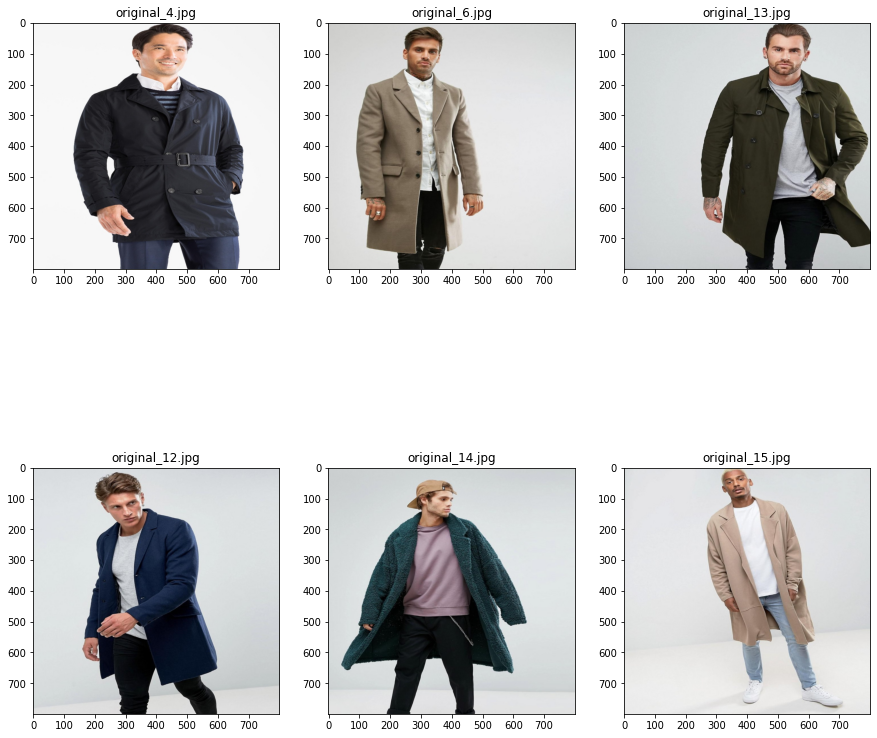

In [10]:
data_dir = "/content/hansungData/MyDrive/hansungData/sampleFashion/"
data_list = glob.glob(data_dir + "*.jpg", recursive=True)

imgGrid = []
labelGrid = []
for img_path in data_list:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgGrid.append(img)
    labelGrid.append(os.path.basename(img_path))
cols = int(len(imgGrid) /2)
rows = int(len(imgGrid) /cols)

index = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
          axes[i, j].set_title("{0}".format(labelGrid[index]))
          axes[i, j].imshow(imgGrid[index])
          index += 1
plt.show()

# **사람 영역만 crop**

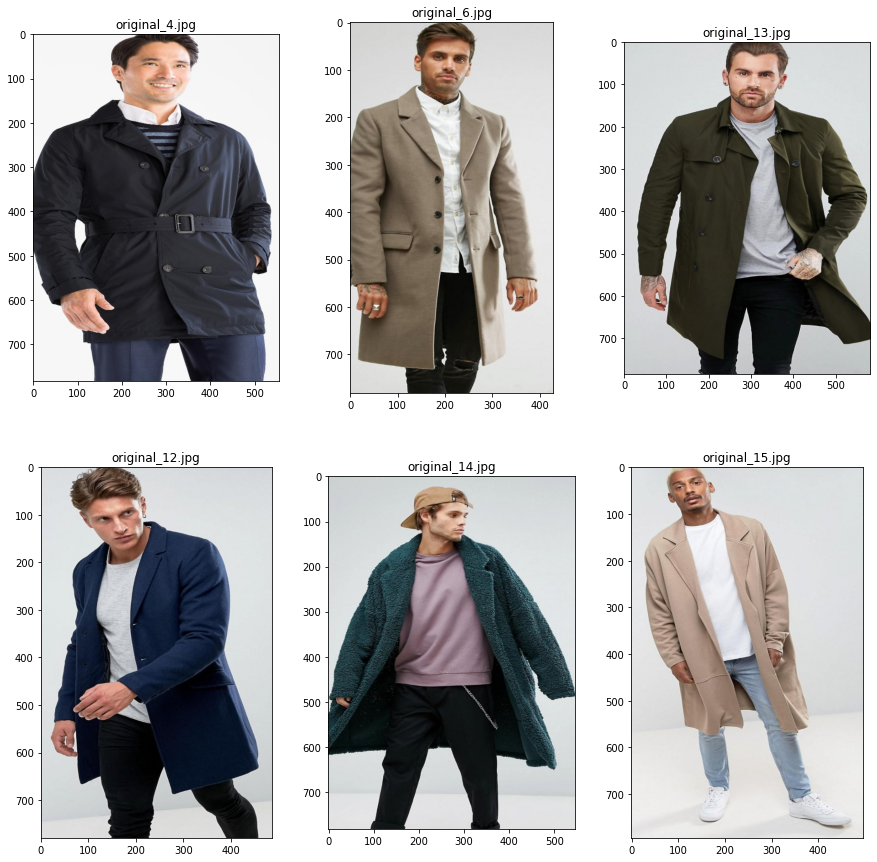

In [11]:
imgGrid = []
labelGrid = []
for img_path in data_list:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    txt_path = img_path.replace(".jpg", ".txt")
    with open(txt_path, "r") as file:
        lines = file.readlines()
    for line in lines[:1]:
        line = line.replace("\n", "")
        cls, sx, sy, ex, ey = line.split(",")
        sx = int(sx) 
        sy = int(sy) 
        ex = int(ex)
        ey = int(ey)
        img = img[sy:ey, sx:ex]
    imgGrid.append(img)
    labelGrid.append(os.path.basename(img_path))
cols = int(len(imgGrid) / 2)
rows = int(len(imgGrid) / cols)

index = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
          axes[i, j].set_title("{0}".format(labelGrid[index]))
          axes[i, j].imshow(imgGrid[index])
          index += 1
plt.show()

# **패션 객체 crop**

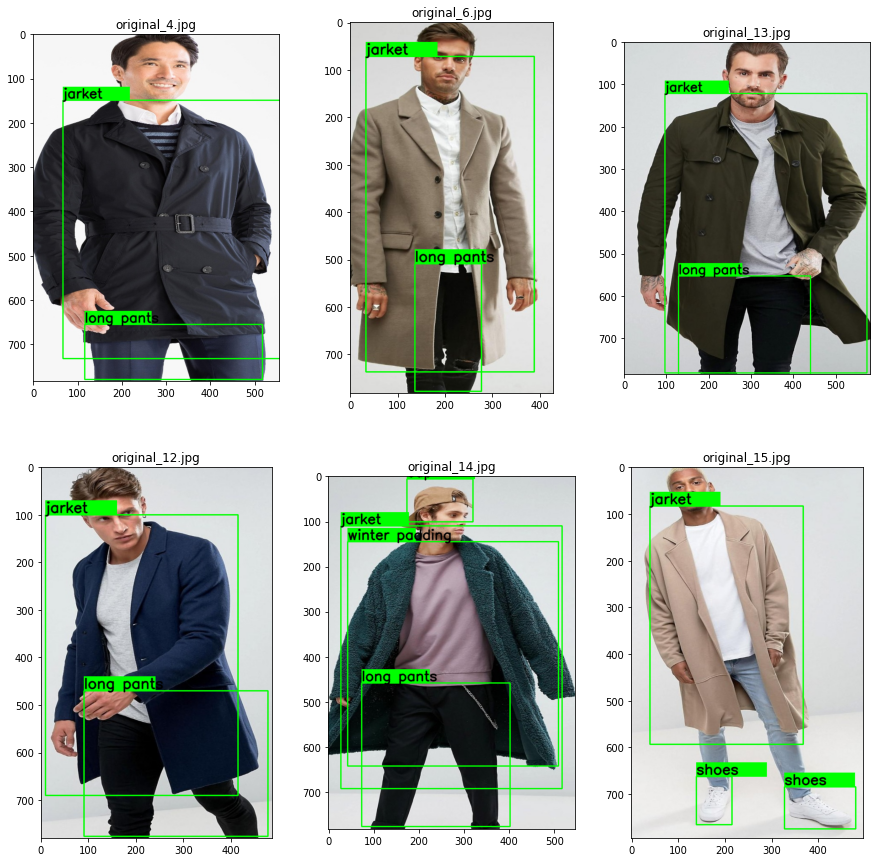

In [12]:
imgGrid = []
labelGrid = []
for img_path in data_list:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    txt_path = img_path.replace(".jpg", ".txt")
    with open(txt_path, "r") as file:
        lines = file.readlines()
    for index, line in enumerate(lines):
        line = line.replace("\n", "")
        cls, sx, sy, ex, ey = line.split(",")
        sx = int(sx) 
        sy = int(sy) 
        ex = int(ex)
        ey = int(ey)
        if index == 0:
            img = img[sy:ey, sx:ex]
        else:
            img = cv2.rectangle(img, (sx, sy), (ex, ey), (0, 255, 0), 2)
            pt3 = (sx, sy - 30)
            pt4 = (sx + 150, sy)
            cv2.rectangle(img, pt3, pt4, (0, 255, 0), -1)
            cv2.putText(img, cls, (sx, sy - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    imgGrid.append(img)
    labelGrid.append(os.path.basename(img_path))
cols = int(len(imgGrid) / 2)
rows = int(len(imgGrid) / cols)

index = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
          axes[i, j].set_title("{0}".format(labelGrid[index]))
          axes[i, j].imshow(imgGrid[index])
          index += 1
plt.show()

# ***이미지 색상 추출 함수 정의***

In [6]:
def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625  # 25**7

    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1 ** 2 + b1 ** 2)
    C2 = math.sqrt(a2 ** 2 + b2 ** 2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave ** 7 / (C_ave ** 7 + C_25_7)))

    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2

    C1_ = math.sqrt(a1_ ** 2 + b1_ ** 2)
    C2_ = math.sqrt(a2_ ** 2 + b2_ ** 2)

    if b1_ == 0 and a1_ == 0:
        h1_ = 0
    elif a1_ >= 0:
        h1_ = math.atan2(b1_, a1_)
    else:
        h1_ = math.atan2(b1_, a1_) + 2 * math.pi

    if b2_ == 0 and a2_ == 0:
        h2_ = 0
    elif a2_ >= 0:
        h2_ = math.atan2(b2_, a2_)
    else:
        h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0:
        dh_ = 0
    elif dh_ > math.pi:
        dh_ -= 2 * math.pi
    elif dh_ < -math.pi:
        dh_ += 2 * math.pi
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)

    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2

    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_

    if _dh <= math.pi and C1C2 != 0:
        h_ave = (h1_ + h2_) / 2
    elif _dh > math.pi and _sh < 2 * math.pi and C1C2 != 0:
        h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh > math.pi and _sh >= 2 * math.pi and C1C2 != 0:
        h_ave = (h1_ + h2_) / 2 - math.pi
    else:
        h_ave = h1_ + h2_

    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(
        3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)

    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0:
        h_ave_deg += 360
    elif h_ave_deg > 360:
        h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25) ** 2))

    R_C = 2 * math.sqrt(C_ave ** 7 / (C_ave ** 7 + C_25_7))
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T

    Lm50s = (L_ave - 50) ** 2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1

    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H

    dE_00 = math.sqrt(f_L ** 2 + f_C ** 2 + f_H ** 2 + R_T * f_C * f_H)
    return dE_00

def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    for index, (percent, color) in enumerate(zip(hist, centroids)):
        color = (color[0], color[1], color[2])
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color, -1)
        startX = endX
    return bar

def get_color_name(input_colors):
    color_names = []
    for input_color in input_colors:
        match_color = None
        '''255*255*255'''
        min = 16581375
        for index, color in enumerate(color_list.keys()):
            # diff = sqrt(pow(color_list[color][0] - int(input_color["color"][0]), 2) + pow(color_list[color][1] - int(input_color["color"][1]), 2) + pow(color_list[color][2] - int(input_color["color"][2]), 2))
            diff = CIEDE2000(color_list[color], (int(input_color["color"][0]), int(input_color["color"][1]), int(input_color["color"][2])))
            if index == 0:
                min = diff
                match_color = color
            else:
                if diff < min:
                    min = diff
                    match_color = color
        color_names.append(re.sub(r'[0-9]+', '', match_color))
    return list(dict.fromkeys(color_names))

def sort_colors(hist, centroids, thresh):
    cluster = []
    result = []
    for percent, color in zip(hist, centroids):
        color_value = (color[0], color[1], color[2])
        cluster.append({"color": color_value, "percent": percent})
    cluster = sorted(cluster, key=(lambda color: color["percent"]), reverse=True)
    for element in cluster:
        if element["percent"] >= thresh:
            result.append(element)
    return result

def get_colors(img, topk = 3, crop_ratio = 0.15, thresh = 0.2):
    img = cv2.resize(img, (200, 200))
    crop = img[int(img.shape[1] * crop_ratio):int(img.shape[1] * (1 - crop_ratio)), int(img.shape[0] * crop_ratio):int(img.shape[0] * (1 - crop_ratio))]
    crop_reshape = crop.reshape((crop.shape[0] * crop.shape[1], 3))
    clt = KMeans(n_clusters=topk)
    clt.fit(crop_reshape)
    hist = centroid_histogram(clt)
    colors = sort_colors(hist, clt.cluster_centers_, thresh)
    colors = get_color_name(colors)
    # print(colors)
    bar = plot_colors(hist, clt.cluster_centers_)
    return colors, bar

# **패션 객체 색상 추출**

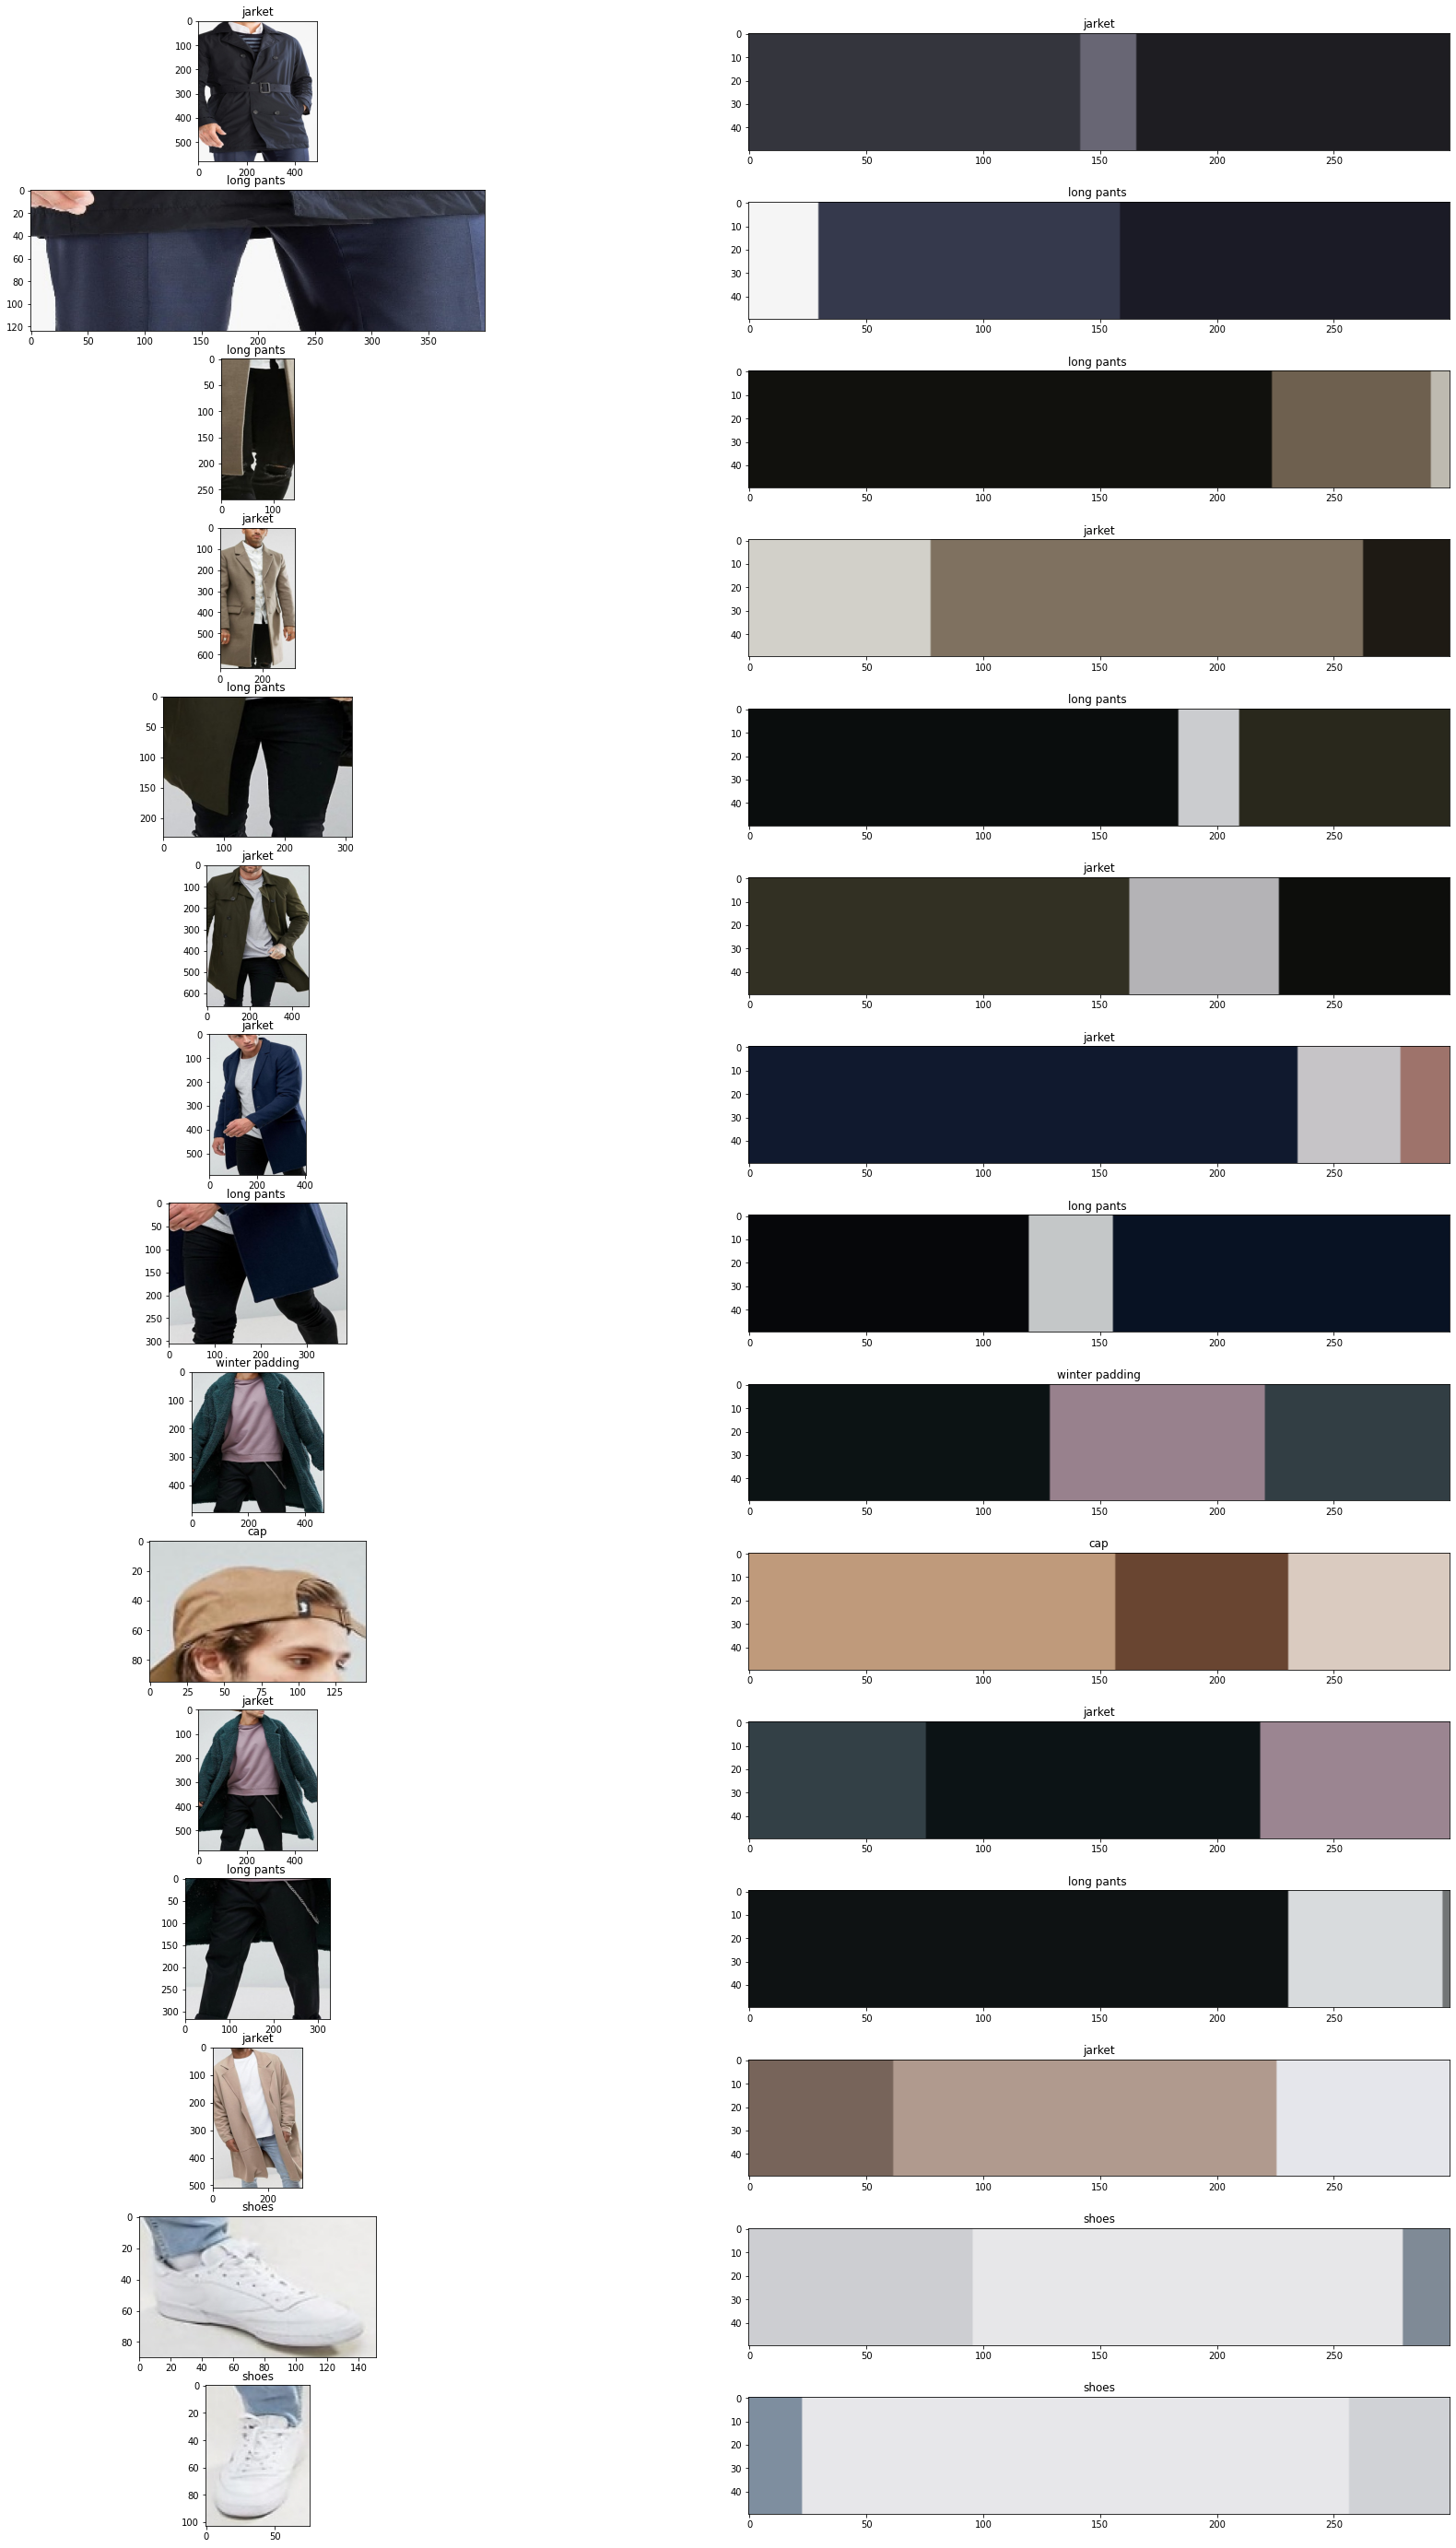

In [24]:
imgGrid = []
labelGrid = []
for img_path in data_list:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    txt_path = img_path.replace(".jpg", ".txt")
    with open(txt_path, "r") as file:
        lines = file.readlines()
    for index, line in enumerate(lines):
        line = line.replace("\n", "")
        cls, sx, sy, ex, ey = line.split(",")
        sx = int(sx) 
        sy = int(sy) 
        ex = int(ex)
        ey = int(ey)
        if index == 0:
            img = img[sy:ey, sx:ex]
        else:
            bbox = img[sy:ey, sx:ex]
            color, bar = get_colors(bbox)
            imgGrid.append(bbox)
            imgGrid.append(bar)
            labelGrid.append(os.path.basename(cls))
            labelGrid.append(os.path.basename(cls))
rows = int(len(imgGrid) / 2)
cols = int(len(imgGrid) / rows)

index = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(30, 50))

for i in range(rows):
    for j in range(cols):
          axes[i, j].set_title("{0}".format(labelGrid[index]))
          axes[i, j].imshow(imgGrid[index])
          index += 1
plt.show()